# Found in a Random Forest 
**AI Academy: Semester 2 Capstone Project**

This notebook contains a business case, information and an evaluation of the dataset, and the decision tree and random forest analytical models.


# Business Case


According to the Federal Trade Commission (FTC), in 2021 more than $5.8 billion was lost due to report fraud [(Mayfield, 2022)](https://www.ftc.gov/news-events/news/press-releases/2022/02/new-data-shows-ftc-received-28-million-fraud-reports-consumers-2021-0). All organizations, governments, and private citizens are at risk of becoming victims to fraud. In 2021, there was over 995,000 reports of imposter scams, over 390,000 reports of government documents and/or benefts fraud, and almost 390,000 reports of credit card fraud [(FTC Consumer Sentinel Network, 2022)](https://public.tableau.com/app/profile/federal.trade.commission/viz/TheBigViewAllSentinelReports/TrendsOverTime).


The supervised machine learning models below can be leveraged to help detect and prevent financial fraud; specifically, credit card fraud. By detecting and preventing financial fraud, organizations, individuals, and even governments can protect their assets from bad actors.



# Dataset: Credit Card Fraud Detection [(Kaggle)](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?datasetId=310&sortBy=voteCount)

The dataset used contains transactions made by credit cards in September 2013 by European cardholders. The dataset presents 284,807 transactions, of which 492 were fraudulent. As this dataset contains real-world credit card transactions, it his highly suitable for tackling financial fraud.

The dataset will require minimal preprocessing as it only contains numerical input variables. 29 of 31 features have already undergone a PCA transformation. Of note, due to confidentiality reasons, the only labeled features are 'Time' and 'Amount', which are the two that have not undergone PCA. The rest are labeled as V1 - V28. Feature 'Class' is the response variable as it indicates if the transaction was deemed fraudulent with 1 being fraudulent and 0 being legitimate.

**Variable Information:**
- The units are not provided by Kaggle; therefore, it is unknown what the measure of time is or the currency
- The data set is from European cardholders during late summer and/or early fall; therefore, spending habits are unit to that time of year and population
- Only three features are known by name; therefore, it is a possibility that we may not know the feature that performs the best by name

# Code
The two supervised machine learning modules that I decided to employ is a decision tree and a random forest analytical module. These modules work well with classification problems. 

The code found below includes the following steps:
- Importing of libraries and the Kaggle dataset
- Basic EDA
- Decision Tree Module
- Random Forest Module
- Optimizing using GridSearchCV
- Feature Importance and Plots

# Imports

In [75]:
# libraries for decision tree and RANDOM FORESTTTTTTTTTTTTTTTTTTTTTTTTTTTTT

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# ------

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
# import data

data = pd.read_csv('data/creditcard.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Cursory Observations:
1. No miss values
2. All numerical values
3. Large data set with 284,807 values per column
4. Time, Amount, and Class are the only known features
5. The target variable is Class

In [61]:
# Display the first five rows of the data

data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [49]:
# Basic summary statistics of known features

data['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [58]:
data['Time'].describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [73]:
data['V7'].describe()

count    2.848070e+05
mean    -5.556467e-16
std      1.237094e+00
min     -4.355724e+01
25%     -5.540759e-01
50%      4.010308e-02
75%      5.704361e-01
max      1.205895e+02
Name: V7, dtype: float64

In [74]:
data['V20'].describe()

count    2.848070e+05
mean     6.406703e-16
std      7.709250e-01
min     -5.449772e+01
25%     -2.117214e-01
50%     -6.248109e-02
75%      1.330408e-01
max      3.942090e+01
Name: V20, dtype: float64

In [52]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [77]:
print('The mean transaction amount is approximately is', round(data['Amount'].mean()))
print('The mean transaction time is approximately is', round(data['Time'].mean()),
      'with a standard deviation of', round(data['Time'].std()))
print(' ')

print(round(data['Class'].value_counts()[1]/len(data)*100,2), '% of the transactions are fraudulent')
print(round(data['Class'].value_counts()[0]/len(data)*100,2), '% of the transactions are legitimate')

The mean transaction amount is approximately is 88.0
The mean transaction time is approximately is 94814.0 with a standard deviation of 47488.0
 
0.17 % of the transactions are fraudulent
99.83 % of the transactions are legitimate


Cursory Observations:
1. The data set is heavily skewed 
2. The transaction amount appears low
3. As the data set only covers a span of two days, we can assume the time variable is not days or hours

# EDA

C:\Users\jumholtz\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

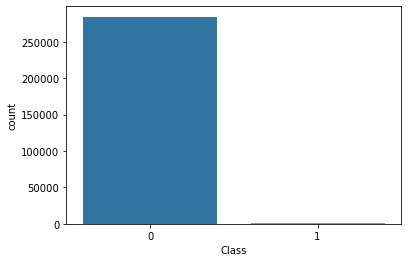

In [11]:
# Plots to help visualize the data

sns.countplot(data.Class)

C:\Users\jumholtz\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jumholtz\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


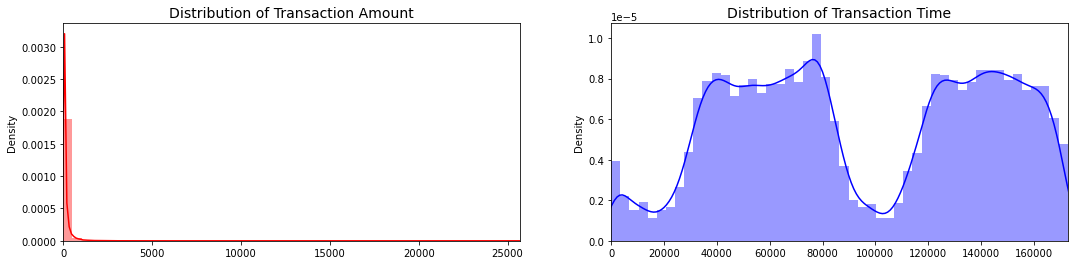

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

C:\Users\jumholtz\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jumholtz\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


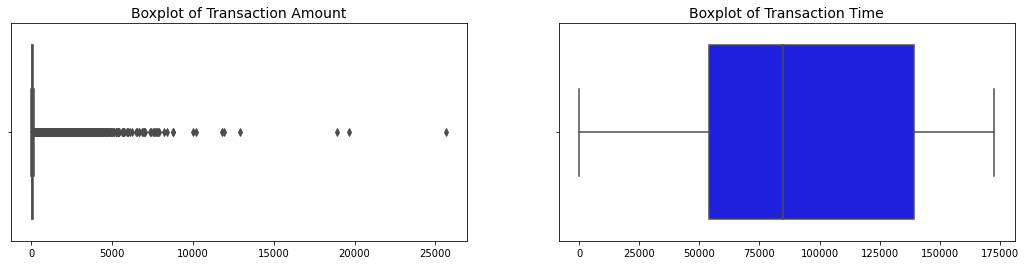

In [72]:
fig, ax =plt.subplots(1,2, figsize=(18,4))

sns.boxplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Boxplot of Transaction Amount', fontsize=14)

sns.boxplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Boxplot of Transaction Time', fontsize=14)

plt.show()

C:\Users\jumholtz\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jumholtz\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


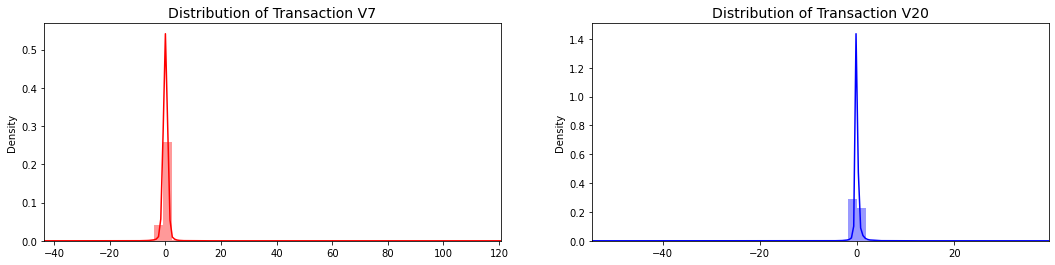

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

v7_val = data['V7'].values
v20_val = data['V20'].values

sns.distplot(v7_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction V7', fontsize=14)
ax[0].set_xlim([min(v7_val), max(v7_val)])

sns.distplot(v20_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction V20', fontsize=14)
ax[1].set_xlim([min(v20_val), max(v20_val)])

plt.show()

C:\Users\jumholtz\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jumholtz\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


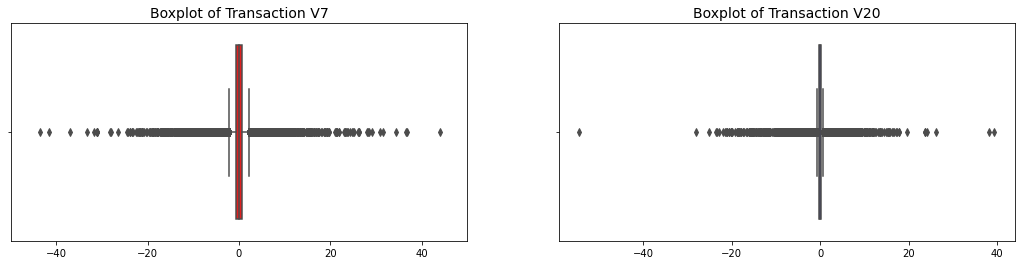

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.boxplot(v7_val, ax=ax[0], color='r')
ax[0].set_title('Boxplot of Transaction V7', fontsize=14)
ax[0].set_xlim([-50, 50])

sns.boxplot(v20_val, ax=ax[1], color='b')
ax[1].set_title('Boxplot of Transaction V20', fontsize=14)


plt.show()

**Scaling**

As indicated in the onset of the of the analysis and per the plots above, Time and Amount have not undergone a PCA transformation like the rest of the other features. As a result, Time and Amount will have to be scaled to the other columns.

Our options for easy scaling are either Scikit-learn's MinMaxScaler, StandardScaler, or RobustScaler.

MinMaxScaler and StandardScaler are the the most viable options due to the presence of negative numbers and strong outliers. RobustScaler is great for handling large outliers as it utilizes IQR.

In [85]:
# Make a copy of the dataframe

data_copy = data.copy()

# Scale Time and Amount
robust_scaler = RobustScaler()

data_copy['amount_scaled'] = robust_scaler.fit_transform(data_copy['Amount'].values.reshape(-1,1))
data_copy['time_scaled'] = robust_scaler.fit_transform(data_copy['Time'].values.reshape(-1,1))

# Drop the unscaled Time and Amount and insert the new columns to the dataframe
data_copy.drop(['Time', 'Amount'], axis=1, inplace=True)

amount_scaled = data_copy['amount_scaled']
time_scaled = data_copy['time_scaled']

data_copy.drop(['amount_scaled', 'time_scaled'], axis=1, inplace=True)
data_copy.insert(0, 'amount_scaled', amount_scaled)
data_copy.insert(1, 'time_scaled', time_scaled)

data_copy.head()

amount_scaled  time_scaled        V1        V2        V3        V4  \
0       1.783274    -0.994983 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -0.994983  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -0.994972 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -0.994972 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -0.994960 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  Class  
0 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053      0  
1  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724      0  
2  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752      0  
3 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458      0  
4 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153      0  

[5 rows x 31 columns]